# Circuit implementation of quantum teleportation using Cirq

This notebook will teach you how to construct your own circuits for a quantum teleportation protocol using Cirq.

# Install Cirq

Install Cirq if you haven't.

In [ ]:
!pip install --quiet cirq

     |████████████████████████████████| 1.5MB 2.1MB/s 
     |████████████████████████████████| 389kB 6.7MB/s 
     |████████████████████████████████| 1.3MB 8.0MB/s 


# Importing packages

In [ ]:
import cirq # No need to explain why
from cirq.contrib.svg import SVGCircuit # Required to display some fancy circuits
import numpy as np # Required to prepare and play around with the state to be teleported

# The circuit

Now, we move on to main part of the notebook. In this section, we shall explain the construction of the circuit for implementing a quantum teleportation protocol. The procedure enables Alice to send (teleport) an arbitray qubit worth information to Bob, without knowing what the state pertaining to that qubit is. The protocol is as follows:

1. Alice, has in her possession, a qubit $q$ with the state $|\psi \rangle$ prepared in it.

2. Alice and Bob has to be sharing a Bell state $|\beta\rangle = \frac{1}{\sqrt{2}}\Big( |00\rangle + |11\rangle\Big)$ among them, that is, one qubit $q_A$ in this state should be with Alice, and the other qubit $q_B$ should be with Bob.

3. Alice applies a $CNOT$ gate, controlled on $q$ and targetted on $q_A$. Then she applies a Hadamard gate on $q$. 

5. Then, Alice measures both qubits in her possession. The output of the measurement is conveyed to Bob through a classical channel. 

6. After measurement, if $q_A$ resulted in $1$, Bob applies an $X$ gate on the qubit in his possession, $q_B$. Then, if $q$ resulted in $1$, Bob applies a $Z$ gate on $q_B$. At this point, we have the qubit $q_B$ having the state $|\psi \rangle$.

Hence, the circuit that we are going to implemented would look like this

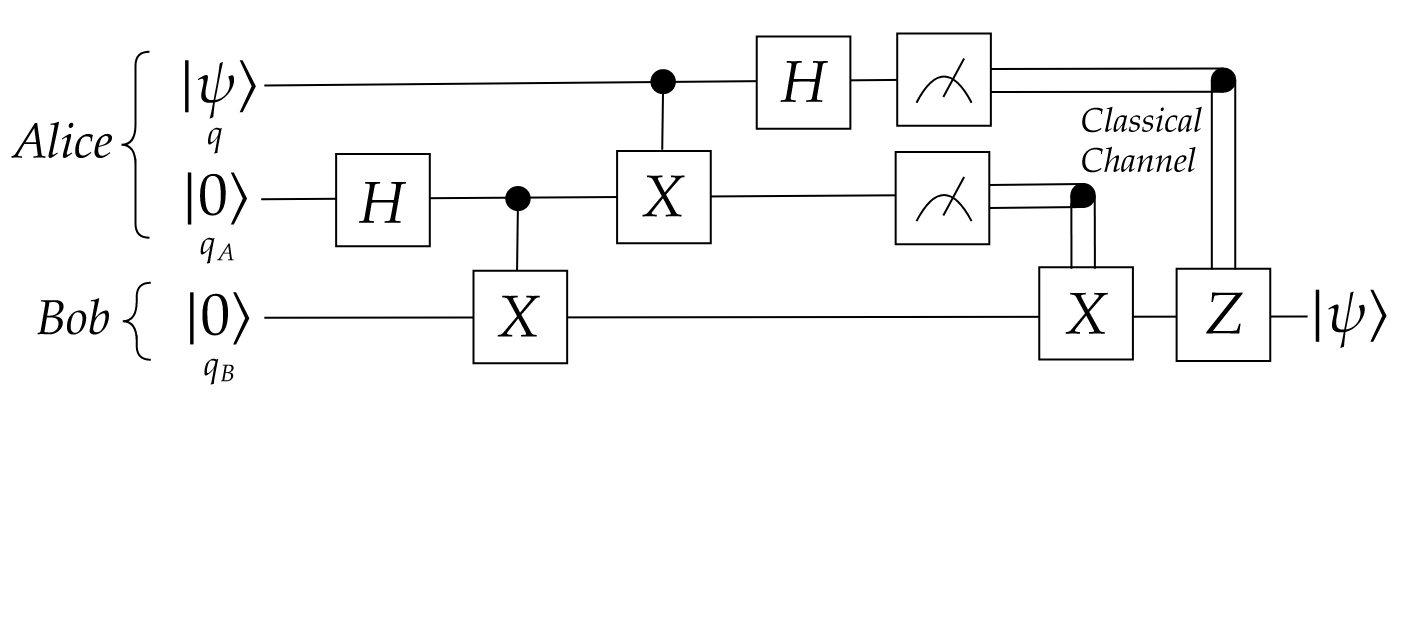

# Implementation of Quantum Teleportation

Now, we move on to constructing this circuit using Cirq

In the first part of the circuit, we'll prepare a random state $| \psi \rangle$ in the first register and then see how the state looks like in Cirq. For that, we first initialize a quantum circuit.

In [ ]:
# Prepare circuit 
circuit = cirq.Circuit()

The next step is to initialize the qubits. For this circuit, we require three qubits. 

In [ ]:
# Prepare qubits
q, qA, qB = cirq.LineQubit.range(3)

Now we'll prepare $|\psi\rangle$ in the first qubit and take a look at the state at this point. $| \psi \rangle$ is generated by applying a $R_X(\theta)$ and $R_Z(\omega)$ gates on the first qubit, with random values of $\theta$ and $\omega$. 

In [ ]:
# Apply rotation around x-axis followed by rotation around z-axis on qubit 0.
circuit.append(cirq.rx(13)(q))
circuit.append(cirq.rz(19)(q))

This is our state $|\psi\rangle$. Let's take a look at the state at this point.

In [ ]:
# Simulate the circuit
s=cirq.Simulator()
result=s.simulate(circuit, qubit_order=[q, qA, qB])
statevector = np.around(result.final_state_vector, 10)
statevector

array([-0.97382605+0.07339166j, -0.        +0.j        ,
       -0.        +0.j        , -0.        +0.j        ,
       -0.01616651+0.21451166j, -0.        +0.j        ,
       -0.        +0.j        , -0.        +0.j        ], dtype=complex64)

By converting each index of the vector into binary, this state can be viewed as 

In [ ]:
# This function converts a decimal number to its binary expansion
def Binary(x, BitNo):
  format(x, 'b').zfill(BitNo)
  Binlist = [int(y) for y in list(format(x, 'b').zfill(BitNo))]
  return Binlist

state_dict = {}
for i in range(8):
  bin_list = Binary(i,3)
  state_dict["".join(map(str, bin_list))] = statevector[i]

state_dict

{'000': (-0.97382605+0.07339166j),
 '001': (-0+0j),
 '010': (-0+0j),
 '011': (-0+0j),
 '100': (-0.016166508+0.21451166j),
 '101': (-0+0j),
 '110': (-0+0j),
 '111': (-0+0j)}

From the description of the state, we can see that $| \psi \rangle$ is indeed in the first qubit.

In the next part of the notebook, we shall carry out the quantum teleportation protocol. We start by initializing a quantum circuit.

In [ ]:
# Prepare circuit 
circuit = cirq.Circuit()

The next step is to initialize the qubits. For this circuit, we require three qubits. 

In [ ]:
# Prepare qubits
q, qA, qB = cirq.LineQubit.range(3)

Now, we shall start applying the gates.

In [ ]:
# Apply rotation around x-axis followed by rotation around z-axis on qubit 0.
circuit.append(cirq.rx(13)(q))
circuit.append(cirq.rz(19)(q))

This is our state $|\psi\rangle$. We shall initialize the circuit with this state while we execute the circuit. Next step is to prepare $|\beta\rangle = \frac{1}{\sqrt{2}}\Big( |00\rangle + |11\rangle\Big)$ in the second ($q_A$) and third ($q_B$) qubit. This is done by applying an $H$ gate followed by a $CNOT$ gate.

In [ ]:
# Apply Hadamard gate on alice_qubit
circuit.append(cirq.H(qA))

# Apply CNOT gate on alice_qubit and bob_qubit
circuit.append(cirq.CNOT(qA, qB))

Now is the teleportation part. Alice applies a $CNOT$ gate on $q_A$ and $q$. Then she applies an $H$ gate on alice_qubit.

In [ ]:
# Apply CNOT gate on qubits 0 and 1 
circuit.append(cirq.CNOT(q, qA))

# Apply Hadamard gate on qubit 0
circuit.append(cirq.H(q))

Next, Alice measures the qubits in her possession.

In [ ]:
# Measure alice_qubit and information qubit
circuit.append(cirq.measure(q, qA))

Now, depending on the result of this measurement, Bob applies gates on the third qubit. If the measurement of $q_A$ resulted in $1$, Bob applies an $X$ gate and then if the measurement of $q$ resulted in $1$, he applies a $Z$ gate. 

In [ ]:
# Apply X gate controlled on the measurement output from alice_qubit
circuit.append(cirq.CNOT(qA, qB))

# Apply X gate controlled on the measurement output from information qubit
circuit.append(cirq.CZ(q, qB))

Let's take a look at our circuit now

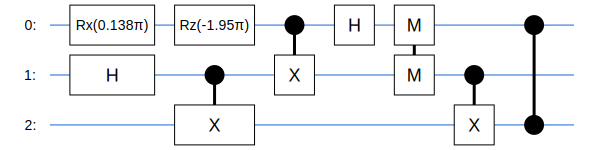

In [ ]:
# Display circuit
SVGCircuit(circuit)

Next step is to run the circuit with the and take a look at the output state.

In [ ]:
# Simulate the circuit
s=cirq.Simulator()
result=s.simulate(circuit, qubit_order=[q, qA, qB])
statevector = np.around(result.final_state_vector, 10)
statevector

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
       -0.97382593+0.07339166j, -0.0161665 +0.21451165j,
        0.        +0.j        , -0.        +0.j        ], dtype=complex64)

By converting each index of the vector into binary, this state can be viewed as 

In [ ]:
state_dict = {}
for i in range(8):
  bin_list = Binary(i,3)
  state_dict["".join(map(str, bin_list))] = statevector[i]

state_dict

{'000': 0j,
 '001': 0j,
 '010': 0j,
 '011': 0j,
 '100': (-0.97382593+0.07339166j),
 '101': (-0.016166504+0.21451165j),
 '110': 0j,
 '111': (-0+0j)}

From the output, we can see that the qubit has been teleported from the first qubit to the thrid qubit. Next step is to verify if we really did retreive $|\psi \rangle$ in the final qubit. For that, first we want to extract $|\psi\rangle$ from the output, and store it in an array named "quantum_output". Once that is done, we compute the fidelity between that and $| \psi \rangle $, prepared in another qubit. That is, we compute

\begin{equation}
  \Big| \langle \text{quantum_output}|\psi \rangle\Big|
\end{equation}

and if this output is $1$, our circuit seems to be doing the job.

In [ ]:
# Extract the statevector
k = 0
quantum_output = np.zeros(2) + (1j * np.zeros(2))
for i in range(8):
  if np.abs(statevector[i]) > 0:
    quantum_output[k] = statevector[i]
    k += 1

# Prepare circuit 
circuit = cirq.Circuit()

# Prepare qubits
q = cirq.LineQubit.range(1)

# Apply rotation around x-axis followed by rotation around z-axis on qubit 0.
circuit.append(cirq.rx(13)(q[0]))
circuit.append(cirq.rz(19)(q[0]))

# Simulate the circuit
s=cirq.Simulator()
result=s.simulate(circuit, qubit_order=q)
statevector = np.around(result.final_state_vector, 10)

# Display the fidelity
print("The fidelity is: {}".format(np.abs(np.dot(np.conj(quantum_output), statevector))))

The fidelity is: 1.0000000031321021


As expected, the output is $1$. 

Now, let's run this teleportation scheme multiple times and observe the result. 

In [ ]:
 for i in range(20): 
  # Prepare circuit 
  circuit = cirq.Circuit()

  # Prepare qubits
  q, qA, qB = cirq.LineQubit.range(3)

  # Apply rotation around x-axis followed by rotation around z-axis on qubit 0.
  circuit.append(cirq.rx(13)(q))
  circuit.append(cirq.rz(19)(q))

  # Apply Hadamard gate on alice_qubit
  circuit.append(cirq.H(qA))

  # Apply CNOT gate on alice_qubit and bob_qubit
  circuit.append(cirq.CNOT(qA, qB))

  # Apply CNOT gate on qubits 0 and 1 
  circuit.append(cirq.CNOT(q, qA))

  # Apply Hadamard gate on qubit 0
  circuit.append(cirq.H(q))

  # Measure alice_qubit and information qubit
  circuit.append(cirq.measure(q, qA))

  # Apply X gate controlled on the measurement output from alice_qubit
  circuit.append(cirq.CNOT(qA, qB))

  # Apply X gate controlled on the measurement output from information qubit
  circuit.append(cirq.CZ(q, qB))

  # Simulate the circuit
  s=cirq.Simulator()
  result=s.simulate(circuit, qubit_order=[q, qA, qB])
  statevector = np.around(result.final_state_vector, 10)

  # Extract the statevector
  k = 0
  quantum_output = np.zeros(2) + (1j * np.zeros(2))
  for i in range(8):
    if np.abs(statevector[i]) > 0:
      quantum_output[k] = statevector[i]
      k += 1

  # Prepare circuit 
  circuit = cirq.Circuit()

  # Prepare qubits
  q = cirq.LineQubit.range(1)

  # Apply rotation around x-axis followed by rotation around z-axis on qubit 0.
  circuit.append(cirq.rx(13)(q[0]))
  circuit.append(cirq.rz(19)(q[0]))

  # Simulate the circuit
  s=cirq.Simulator()
  result=s.simulate(circuit, qubit_order=q)
  statevector = np.around(result.final_state_vector, 10)

  # Display the fidelity
  print("The fidelity is: {}".format(np.abs(np.dot(np.conj(quantum_output), statevector))))

The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021
The fidelity is: 1.0000000031321021


As the result is 1 always, we can safely assume that our circuit is indeed a quantum teleportation protocol.